# Ploting different new features

In [1]:
#pip install ta

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('seaborn')
np.seterr(divide='ignore', invalid='ignore')

import ta

In [4]:
# Load data
#df_curr = pd.read_csv('data/close.csv', sep=',')
#df_curr = ta.utils.dropna(df_curr)

In [70]:
df_curr=pd.read_csv('sol.csv', index_col=0)
df_curr['Date'] = pd.to_datetime(df_curr['Date'], format='%Y-%m-%d')
df_curr = ta.add_all_ta_features(df_curr, "Open", "High", "Low", "Close", "Volume", fillna=True)

In [10]:
df_curr.shape

(746, 7)

In [16]:
df_curr.head()

,Date,Close,Adj_Close,Open,High,Low,Volume
1080,2020-04-10,0.951054,0.832005,0.694187,0.951054,0.832005,87364276.0
1081,2020-04-11,0.776819,0.951054,0.765020,0.776819,0.951054,43862444.0
1082,2020-04-12,0.882507,0.785448,0.762426,0.882507,0.785448,38736897.0
1083,2020-04-13,0.777832,0.890760,0.773976,0.777832,0.890760,18211285.0
1084,2020-04-14,0.661925,0.777832,0.628169,0.661925,0.777832,16747614.0


In [30]:
mean_price = df_curr[['Open', 'Close', 'Volume']].mean()
max_price = df_curr[['Open', 'Close', 'Volume']].max()
min_price = df_curr[['Open', 'Close', 'Volume']].min()
median_price = df_curr[['Open', 'Close', 'Volume']].median()
df_bar = pd.concat([mean_price, max_price, min_price, median_price], axis=1).reset_index()
df_bar.columns = [ 'Measure', 'Mean', 'Max', 'Min', 'Median']

In [33]:
df_bar

,Measure,Mean,Max,Min,Median
0,Open,5.362986e+01,2.461224e+02,0.505194,2.531964e+01
1,Close,5.650049e+01,2.589343e+02,0.515273,2.673679e+01
2,Volume,1.104108e+09,1.706864e+10,652020.000000,3.182848e+08


# Ploting some volatility features

In [61]:
sector = "Mean"
import plotly.graph_objs as go
import plotly.express as px

In [67]:
bar_figure = go.Figure(go.Bar(y=df_bar[sector].sort_values(),

                                name='test fig',
                                orientation='h',
                                marker=dict(color='#3498DB'),
                                opacity=0.6,
                                hovertemplate='State: %{y}<br>' + 'State Average Income: %{x}'
                                ))


bar_figure.update_layout(margin={"r": 20, "t": 30, "l": 0, "b": 10},
                                legend=dict(y=.0, x=.75),
                                yaxis=dict(title='Salary'),
                                showlegend=True,
                                )
bar_figure.update_layout(width=600, height=600)

    
df1 = df_curr[["Date","Close","Open"]]

line_plot1 = px.line(df1,
                     x="Date", y="Open",
                     title="Open Price",
                     template='ggplot2')

line_plot2 = px.line(df1,
                     x="Date", y="Close",
                     title="Close Price",
                     template='ggplot2')

line_plot1.update_layout(width=600, height=450)
line_plot2.update_layout(width=600, height=450)

In [68]:
    bar_figure = go.Figure(go.Bar(y=df_bar[sector].sort_values(),
                                  name='test fig',
                                  marker=dict(color='#3498DB'),
                                  opacity=0.6,
                                  hovertemplate='%{y}<br>' + ' %{x}'
                                  ))

    bar_figure.update_layout(title=dict(text='Mean Value of Coin', x=0.5, font=dict(family='Arial', size=18, color='#606060')),
                             margin={"r": 20, "t": 30, "l": 0, "b": 10},
                             legend=dict(y=.0, x=.75),
                             yaxis=dict(title='Dollars'),
                             showlegend=True,
                             )
    bar_figure.update_layout(width=600, height=200)

In [ ]:
line_plot2.show()

### Bollinger Bands

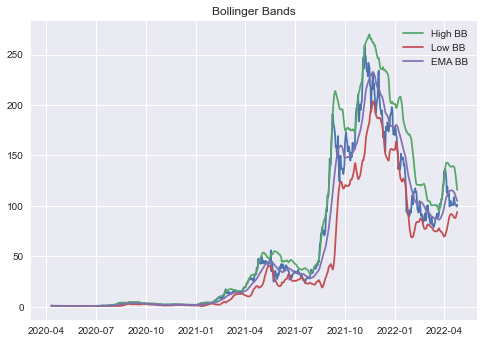

In [22]:
plt.plot(df_curr.Date, df_curr.Close)
plt.plot(df_curr.Date, df_curr.volatility_bbh, label='High BB')
plt.plot(df_curr.Date, df_curr.volatility_bbl, label='Low BB')
plt.plot(df_curr.Date, df_curr.volatility_bbm, label='EMA BB')
plt.title('Bollinger Bands')
plt.legend()
plt.show()

### Keltner Channel

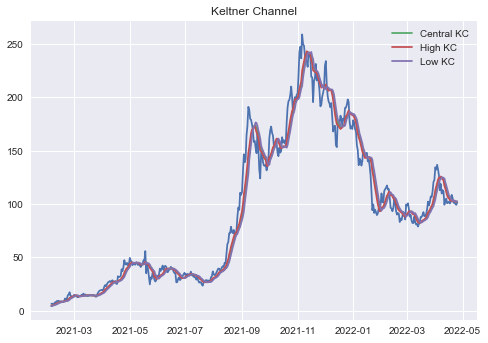

In [24]:
plt.plot(df_curr[300:].Date,df_curr[300:].Close)
plt.plot(df_curr[300:].Date,df_curr[300:].volatility_kcc, label='Central KC')
plt.plot(df_curr[300:].Date,df_curr[300:].volatility_kch, label='High KC')
plt.plot(df_curr[300:].Date,df_curr[300:].volatility_kcl, label='Low KC')
plt.title('Keltner Channel')
plt.legend()
plt.show()

### Donchian Channel

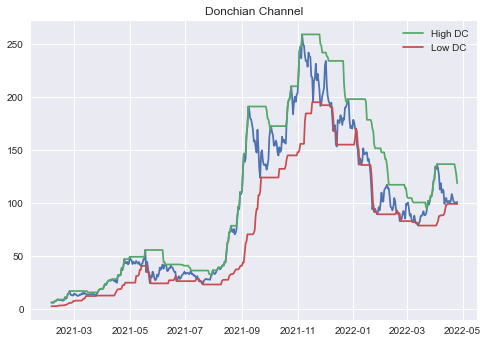

In [25]:
plt.plot(df_curr[300:].Date,df_curr[300:].Close)
plt.plot(df_curr[300:].Date,df_curr[300:].volatility_dch, label='High DC')
plt.plot(df_curr[300:].Date,df_curr[300:].volatility_dcl, label='Low DC')
plt.title('Donchian Channel')
plt.legend()
plt.show()

# Ploting trend features

### MACD

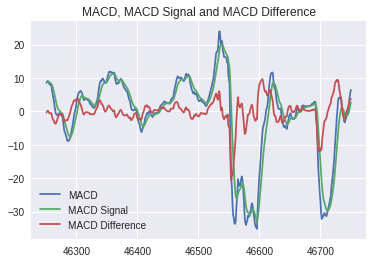

In [10]:
plt.plot(df[40500:41000].trend_macd, label='MACD')
plt.plot(df[40500:41000].trend_macd_signal, label='MACD Signal')
plt.plot(df[40500:41000].trend_macd_diff, label='MACD Difference')
plt.title('MACD, MACD Signal and MACD Difference')
plt.legend()
plt.show()

### KST

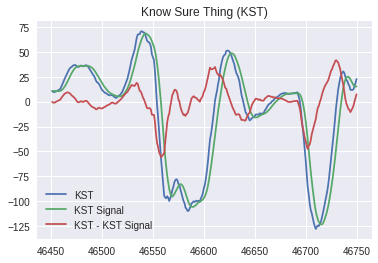

In [11]:
plt.plot(df[40700:41000].trend_kst, label='KST')
plt.plot(df[40700:41000].trend_kst_sig, label='KST Signal')
plt.plot(df[40700:41000].trend_kst_diff, label='KST - KST Signal')
plt.title('Know Sure Thing (KST)')
plt.legend()
plt.show()

### Ichimoku Kinkō Hyō

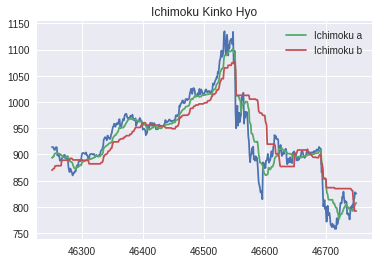

In [12]:
plt.plot(df[40500:41000].Close)
plt.plot(df[40500:41000].trend_ichimoku_a, label='Ichimoku a')
plt.plot(df[40500:41000].trend_ichimoku_b, label='Ichimoku b')
plt.title('Ichimoku Kinko Hyo')
plt.legend()
plt.show()

# Ploting all features

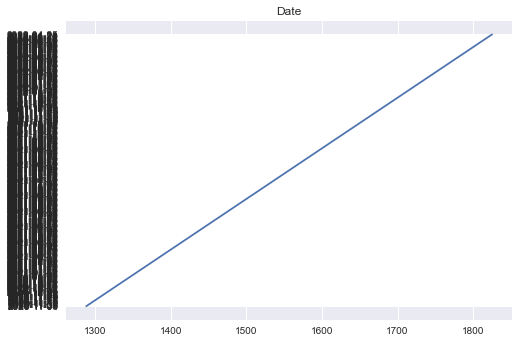

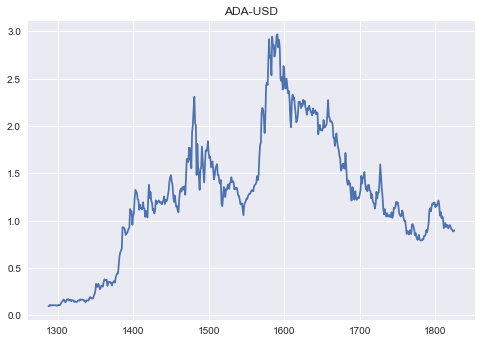

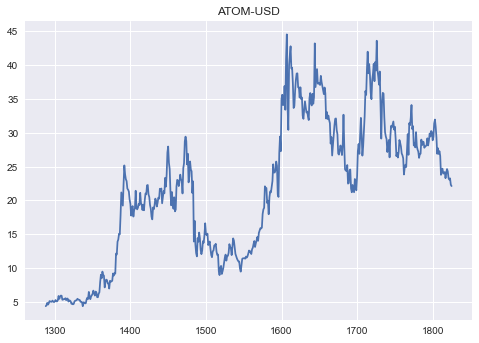

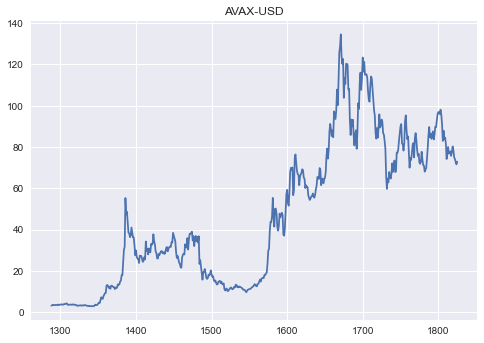

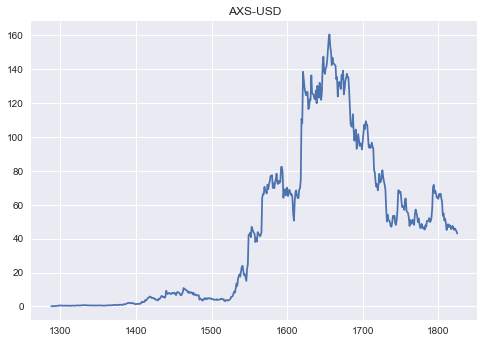

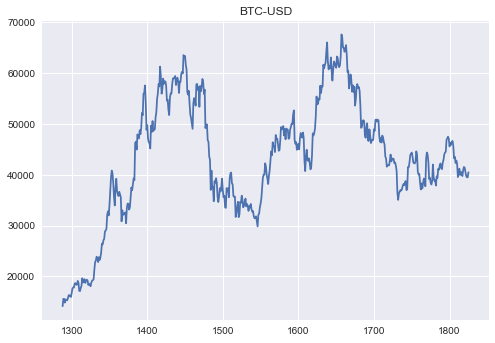

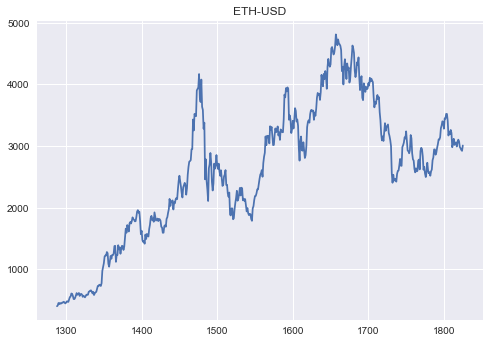

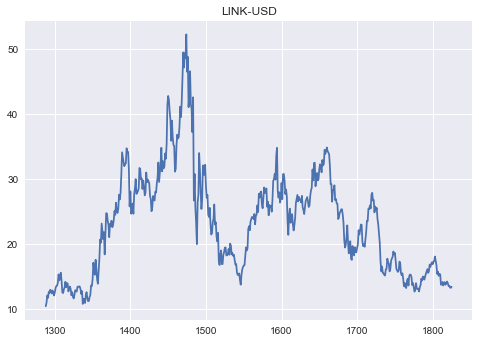

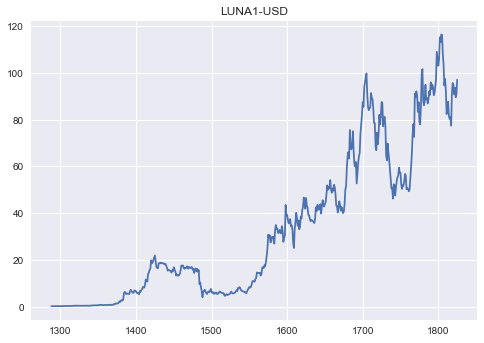

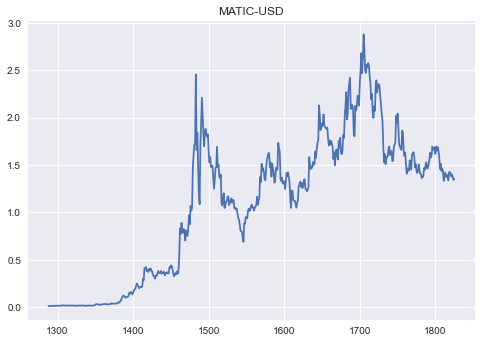

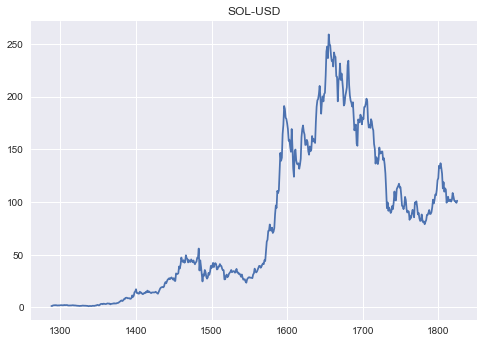

In [7]:
for col in df.columns:
    plt.plot(df[col])
    plt.title(col)
    plt.show()